In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import re
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import lxml
import openpyxl
import codecs
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3"
}
url1 = "https://data.stats.gov.cn/easyquery.htm?cn=E0105"
url2 = "http://data.stats.gov.cn"
'''爬取近五年主要城市数据'''
def driver1(url1):
    driver = webdriver.Chrome()
    driver.get(url1)
    time.sleep(3)
    xRdata = '//*[@id="details-button"]'  # 点击高级
    ActionChains(driver).click(driver.find_element_by_xpath(xRdata)).perform()
    xRdata = '//*[@id="proceed-link"]'  # 点击
    ActionChains(driver).click(driver.find_element_by_xpath(xRdata)).perform()
    time.sleep(3)
    time.sleep(4)  # 加载页面，停留时间长一些
    xTable = '//*[@class="table-container"]/div/div[3]/table/tbody'  # 主要城市年度数据表
    table = driver.find_element_by_xpath(xTable).get_attribute('innerHTML')
    soup = BeautifulSoup(table, 'html.parser')  # 解析表单
    tb = soup.find_all('tr')  # 查找表内tr标签
    tb_p = []  # 各城市名字
    tb_ = []
    tb_1 = [[], [], [], [], []]
    for row in tb:
        row_text = row.text
        # 查找第一个数字的索引
        ret1 = re.search('\d', row_text).start()
        # 将各个城市写入列表中
        tb_p.append(row_text[:ret1])
        # 截断至第一个数字
        row_text = row_text[ret1:]
        for i in range(5):
            try:
                # 顺序查找点
                ret = row_text.find('.')
                # 将第一年年数据保存到列表中
                tb_.append(row_text[:ret + 3])
                # 删去第一年的数据
                row_text = row_text[ret + 3:]
            except:
                break
    for i in range(5):
        for j in range(i, len(tb_), 5):
            try:
                tb_1[i].append(tb_[j])
            except:
                break
    data = {'地区': tb_p,
            '2019年': tb_1[0],
            '2018年': tb_1[1],
            '2017年': tb_1[2],
            '2016年': tb_1[3],
            '2015年': tb_1[4],
            }
    dataframe = pd.DataFrame(data)
    dataframe.to_csv('City_data.csv', index=False, sep=',', encoding='utf-8-sig')
    driver.close()
'''爬取2019年各省GDP'''
def driver2(url2):
    driver = webdriver.Chrome()
    driver.get(url2)
    time.sleep(3)
    xRdata = '//*[@id="details-button"]'  # 点击高级
    ActionChains(driver).click(driver.find_element_by_xpath(xRdata)).perform()
    xRdata = '//*[@id="proceed-link"]'  # 点击
    ActionChains(driver).click(driver.find_element_by_xpath(xRdata)).perform()
    time.sleep(3)
    xRdata = '//*[@id="nav"]/ul/li[6]/a'  # 地区数据
    ActionChains(driver).click(driver.find_element_by_xpath(xRdata)).perform()
    time.sleep(3)
    xPdata = '//*[@id="menuE01"]/li[3]/a'  # 分省年度数据
    ActionChains(driver).click(driver.find_element_by_xpath(xPdata)).perform()
    time.sleep(4)  # 加载页面，停留时间长一些
    xTable = '//*[@class="table-container"]/div/div[3]/table/tbody'  # 数据表
    table = driver.find_element_by_xpath(xTable).get_attribute('innerHTML')
    soup = BeautifulSoup(table, 'html.parser')  # 解析表单
    tb = soup.find_all('tr')  # 查找表内tr标签
    tb_p = []  # 各省市名字
    tb_ = []
    tb_1 = [[], [], [], [], [], [], [], [], [], []]
    for row in tb:
        row_text = row.text
        # 查找第一个数字的索引
        ret1 = re.search('\d', row_text).start()
        # 将各个省份写入列表中
        tb_p.append(row_text[:ret1])
        # 截断至第一个数字
        row_text = row_text[ret1:]
        for i in range(1):
            try:
                # 顺序查找点
                ret = row_text.find('.')
                # 将第一年年数据保存到列表中
                tb_.append(row_text[:ret + 3])
                # 删去第一年的数据
                row_text = row_text[ret + 3:]
            except:
                break
    for i in range(1):
        for j in range(i, len(tb_), 1):
            try:
                tb_1[i].append(tb_[j])
            except:
                break
    data = {'Province': tb_p,
            'GDP': tb_1[0],
            }
    dataframe = pd.DataFrame(data)
    dataframe.to_csv('2019_Province_GDP.csv', index=False, sep=',', encoding='utf-8-sig')
    driver.close()
if __name__ == "__main__":


    driver1(url1)
    driver2(url2)


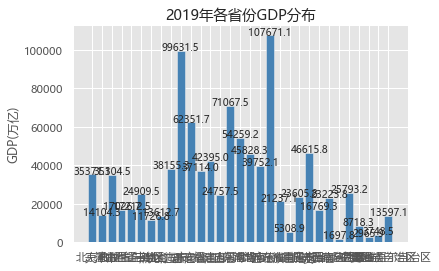

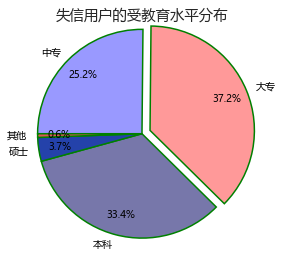

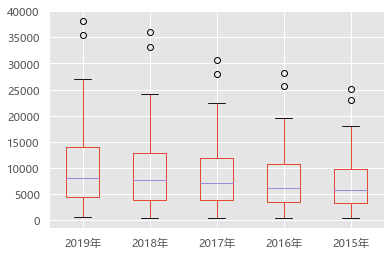

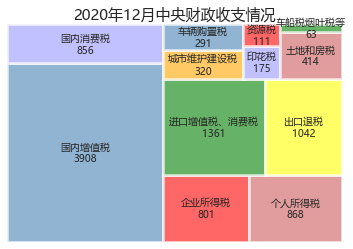

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import collections
import seaborn as sns
from stylecloud import gen_stylecloud
import jieba
import squarify
from pyecharts.charts import Pie
sns.set() #恢复seaborn的默认主题
# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
'''条形图'''
GDP = pd.read_csv('2019_Province_GDP.csv')
# 设置绘图风格
plt.style.use('ggplot')
# 绘制条形图
plt.bar(x= range(GDP.shape[0]), # 指定条形图x轴的刻度值
        height = GDP.GDP, # 指定条形图y轴的数值
        tick_label = GDP.Province, # 指定条形图x轴的刻度标签
        color = 'steelblue', # 指定条形图的填充色
       )
# 添加y轴的标签
plt.ylabel('GDP(万亿)')
# 添加条形图的标题
plt.title('2019年各省份GDP分布')
# 为每个条形图添加数值标签
for x,y in enumerate(GDP.GDP):
    plt.text(x,y+0.1,'%s' %round(y,1),ha='center')
# 显示图形
plt.savefig('test1.png')
plt.show()
'''饼图'''
# 构造数据
edu = [0.2515,0.3724,0.3336,0.0368,0.0057]
labels = ['中专','大专','本科','硕士','其他']
explode = [0,0.1,0,0,0]  # 生成数据，用于突出显示大专学历人群
colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555']  # 自定义颜色
# 将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal')
# 绘制饼图
plt.pie(x = edu, # 绘图数据
        explode=explode, # 突出显示大专人群
        labels=labels, # 添加教育水平标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        radius = 1.2, # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':10, 'color':'black'}, # 设置文本标签的属性值
        )
# 添加图标题
plt.title('失信用户的受教育水平分布')
# 显示图形
plt.savefig('test2.png')
plt.show()
'''箱线图'''
data=pd.read_csv('City_data.csv')
#箱线图
data.boxplot()
plt.savefig('test3.png')
plt.show()
'''树地图'''
# 创建数据
name = ['国内增值税', '国内消费税', '企业所得税', '个人所得税',
        '进口增值税、消费税', '出口退税', '城市维护建设税',
        '车辆购置税', '印花税', '资源税', '土地和房税', '车船税烟叶税等']
income = [3908, 856, 801, 868, 1361, 1042, 320, 291, 175, 111, 414, 63]
# 绘图
colors = ['steelblue', '#9999ff', 'red', 'indianred',
          'green', 'yellow', 'orange']
plot = squarify.plot(sizes=income,  # 指定绘图数据
                     label=name,  # 指定标签
                     color=colors,  # 指定自定义颜色
                     alpha=0.6,  # 指定透明度
                     value=income,  # 添加数值标签
                     edgecolor='white',  # 设置边界框为白色
                     linewidth=3  # 设置边框宽度为3
                     )
# 设置标签大小
plt.rc('font', size=8)
# 设置标题大小
plot.set_title('2020年12月中央财政收支情况', fontdict={'fontsize': 15})
# 去除坐标轴
plt.axis('off')
# 去除上边框和右边框刻度
plt.tick_params(top='off', right='off')
# 显示图形
plt.savefig('test4.png')
plt.show()